In [81]:
#Import necessary libraries
import pandas as pd
df = pd.read_csv("olympics_08_medalists (1).csv")

In [82]:
df_melted = (
    df.melt(id_vars=['medalist_name'], var_name='sport_gender', value_name='medal')  #Reshape from wide to long
      .assign(  # Split 'sport_gender' into 'gender' and 'sport'
          gender=lambda x: x['sport_gender'].str.split('_').str[0],
          sport=lambda x: x['sport_gender'].str.split('_').str[1]
      )
      .drop(columns=['sport_gender'])  # Drop redundant column
      .dropna(subset=['medal'])  # Remove rows where 'medal' is NaN
      .assign(  # Clean and format 'medal' entries
          medal=lambda x: x['medal'].str.replace(r'[\*\(\)]', '', regex=True).str.capitalize()
      )
)
print(df_melted.head())

      medalist_name   medal gender    sport
177    Bair Badënov  Bronze   male  archery
676   Ilario Di Buò  Silver   male  archery
682    Im Dong-hyun    Gold   male  archery
760       Jiang Lin  Bronze   male  archery
920  Lee Chang-hwan    Gold   male  archery


This code begins by reshaping the DataFrame using the melt() function, which converts the dataset from wide to long format. The parameter id_vars=['medalist_name'] ensures that each medalist's name remains intact, while var_name='sport_gender' and value_name='medal' create new columns to store the combined sport and gender information alongside corresponding medal data. This step is crucial to achieving a tidy format, where each row reflects a single observation and each column holds a distinct variable, in line with Hadley Wickham’s Tidy Data principles. Next, assign() is used to split the sport_gender column into separate gender and sport columns by applying a lambda function that divides the string at the underscore. This ensures that combined variables are properly separated into their own columns. The original sport_gender column is then removed using drop(columns=['sport_gender']) to streamline the DataFrame. To improve data quality, rows with missing medal values are dropped using dropna(subset=['medal']), retaining only complete medal records. The medal column is then cleaned and standardized using a lambda function within assign(), where str.replace(r'[\*\(\)]', '', regex=True) removes unwanted characters, and str.capitalize() ensures consistent formatting of medal names. These cleaning steps follow pandas best practices for data preprocessing, as noted in the Pandas Cheat Sheet. Finally, print(df_melted.head()) displays a preview of the transformed DataFrame for quick inspection.


In [83]:
# Add unique IDs for medalists and sports
df_melted['medalist_id'] = df_melted['medalist_name'].factorize()[0] + 1
df_melted['sport_id'] = df_melted['sport'].factorize()[0] + 1

# Check for duplicates
print(f"Number of duplicate rows: {df_melted.duplicated().sum()}")
df_melted.drop_duplicates(inplace=True)

# Inspect the final tidy dataset
print(df_melted.head())
print(df_melted.columns)


Number of duplicate rows: 0
      medalist_name   medal gender    sport  medalist_id  sport_id
177    Bair Badënov  Bronze   male  archery            1         1
676   Ilario Di Buò  Silver   male  archery            2         1
682    Im Dong-hyun    Gold   male  archery            3         1
760       Jiang Lin  Bronze   male  archery            4         1
920  Lee Chang-hwan    Gold   male  archery            5         1
Index(['medalist_name', 'medal', 'gender', 'sport', 'medalist_id', 'sport_id'], dtype='object')


The code begins by using factorize() to generate unique numeric IDs for both medalists and sports, storing them in new columns medalist_id and sport_id. This step ensures that each categorical variable is represented in its own column, eliminating repetition and maintaining the integrity of the data — a key principle of tidy data. Next, the code identifies duplicate rows using duplicated().sum() and removes them with drop_duplicates(inplace=True). This ensures that each observation is unique and occupies a single row, adhering to tidy data guidelines while leveraging Pandas' efficient data-cleaning tools. Finally, the code verifies the dataset's structure by printing the first few rows with head() and checking the column names with columns. This allows for confirmation that the dataset is properly organized, with each observational unit (e.g., medalist, sport, medal type) clearly and accurately represented. Together, these steps illustrate a fundamental workflow for transforming raw, unstructured data into a clean, analysis-ready format that aligns with tidy data principles.

In [84]:
# Check unique values in each column
for column in df_melted.columns:
    print(f"Unique values in {column}: {df_melted[column].unique()}")

# Check for missing values
print(df_melted.isnull().sum())

# Save tidy dataset to new CSV file
df_melted.to_csv('olympics_08_medalists_tidy.csv', index=False)

Unique values in medalist_name: ['Bair Badënov' 'Ilario Di Buò' 'Im Dong-hyun' ... 'Yavor Yanakiev'
 'Yury Patrikeyev' 'Zoltán Fodor']
Unique values in medal: ['Bronze' 'Silver' 'Gold']
Unique values in gender: ['male' 'female']
Unique values in sport: ['archery' 'athletics' 'badminton' 'baseball' 'basketball' 'boxing'
 'canoeing and kayaking' 'road bicycle racing' 'track cycling'
 'mountain biking' 'bmx' 'diving' 'equestrian sport' 'fencing'
 'field hockey' 'association football' 'artistic gymnastics'
 'rhythmic gymnastics' 'trampoline gymnastics' 'handball' 'judo'
 'modern pentathlon' 'rowing' 'sailing' 'shooting sport' 'softball'
 'swimming' 'synchronized swimming' 'table tennis' 'taekwondo' 'tennis'
 'triathlon' 'beach volleyball' 'volleyball' 'water polo' 'weightlifting'
 'freestyle wrestling' 'greco-roman wrestling']
Unique values in medalist_id: [   1    2    3 ... 1873 1874 1875]
Unique values in sport_id: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24

The code begins by looping through each column in the df_melted DataFrame to display the unique values using df_melted[column].unique(). This step is important for identifying the different categories or levels present in each variable, helping ensure the dataset follows tidy data principles — where each variable has its own column and each observation occupies its own row (Wickham, 2014). Following this, the code checks for missing values with df_melted.isnull().sum(), an essential part of the data cleaning process that highlights any gaps or inconsistencies that could affect analysis. Since tidy data should be as complete and consistent as possible, identifying and addressing missing data is a critical task. Lastly, the cleaned and organized dataset is exported to a new CSV file using df_melted.to_csv(), allowing the structured data to be saved and easily accessed for future analysis.

In [85]:
# Create unique ID for medalists
df_melted['medalist_id'] = df_melted['medalist_name'].factorize()[0] + 1

# Create Medalists table
medalists_table = df_melted[['medalist_id', 'medalist_name']].drop_duplicates().reset_index(drop=True)

# Medalists table
print(medalists_table.head())

   medalist_id   medalist_name
0            1    Bair Badënov
1            2   Ilario Di Buò
2            3    Im Dong-hyun
3            4       Jiang Lin
4            5  Lee Chang-hwan


This demonstrates how to create a unique identifier for each medalist and generate a tidy medalists table using pandas. The factorize() function assigns a unique ID to each medalist_name, starting from 1, which serves as a primary key. By selecting only medalist_id and medalist_name and applying drop_duplicates(), the code ensures each medalist appears only once, adhering to the tidy data principle that each row represents a single entity. Using reset_index(drop=True) resets the index for a clean, sequential order. Finally, print(medalists_table.head(10)) displays a sample for quick verification. This process reflects Hadley Wickham’s tidy data principles—structuring data so each variable has its own column and each observation its own row—while also applying efficient pandas techniques, as outlined in the Pandas Cheat Sheet. Creating separate, normalized tables like this improves data integrity and reduces redundancy, especially when working with relational datasets.

In [86]:
# Create unique ID for each sport
df_melted['sport_id'] = df_melted['sport'].factorize()[0] + 1

# Create sports table
sports_table = df_melted[['sport_id', 'sport']].drop_duplicates().reset_index(drop=True)

# Inspect sports table
print(sports_table.head())

   sport_id       sport
0         1     archery
1         2   athletics
2         3   badminton
3         4    baseball
4         5  basketball


See Above. 

In [87]:
# Create the Medals table
medals_table = df_melted[['medalist_id', 'sport_id', 'medal']]
print(medals_table.head())

     medalist_id  sport_id   medal
177            1         1  Bronze
676            2         1  Silver
682            3         1    Gold
760            4         1  Bronze
920            5         1    Gold


See above. 

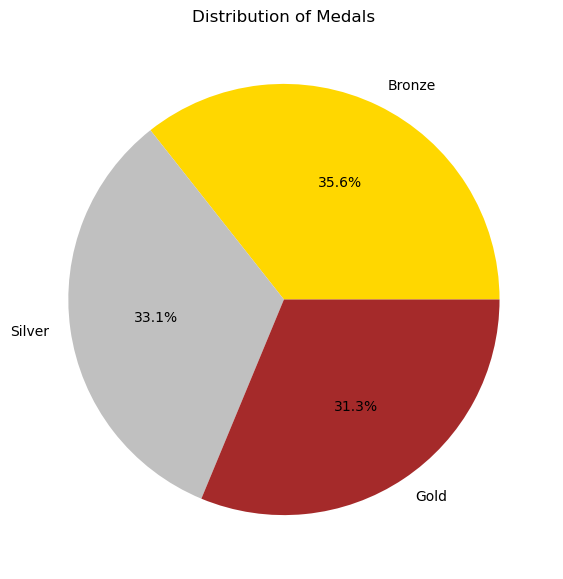

In [ ]:
import matplotlib.pyplot as plt

# Count the medals
medal_counts = df_melted['medal'].value_counts()

# Set color palette
colors = ['gold', 'silver', 'brown']

# Create pie chart using seaborn
plt.figure(figsize=(7, 7))
plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Medals')
plt.show()

This pie chart, created using plt.pie(), visualizes the overall distribution of medal types. The data is generated with df_melted['medal'].value_counts(), which efficiently counts each medal type — a common method for summarizing categorical data, as shown in the Pandas Cheat Sheet. The chart includes labels=medal_counts.index to label each slice, autopct='%1.1f%%' to display percentage values, and colors=['brown', 'silver', 'gold'] to represent traditional medal colors, making the chart intuitive and easy to read. The figure size is set with plt.figure(figsize=(6, 6)) for balance, and plt.title('Medal Distribution') adds a descriptive title. Like the previous bar chart, this visualization benefits from the tidy structure of df_melted, where each observation (medal) is organized in a way that allows for simple and effective visual summaries.

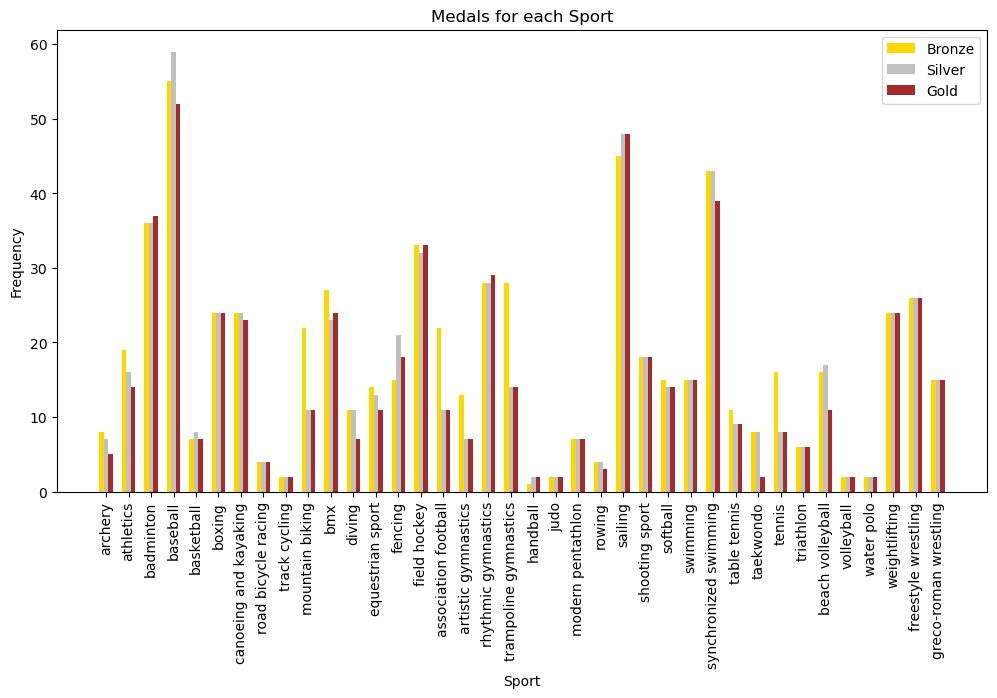

In [89]:
import numpy as np
import matplotlib.pyplot as plt

sports = df_melted['sport'].unique()
medals = df_melted['medal'].unique()
counts = df_melted.groupby(['sport', 'medal']).size().unstack()

x = np.arange(len(sports))
width = 0.2

medal_colors = ['gold', 'silver', 'brown']

fig, ax = plt.subplots(figsize=(12, 6))
for i, medal in enumerate(medals):
    ax.bar(x + i * width, counts[medal], width, label=medal, color=medal_colors[i])

ax.set_title('Medals for each Sport')
ax.set_xlabel('Sport')
ax.set_ylabel('Frequency')
ax.set_xticks(x + width)
ax.set_xticklabels(sports, rotation=90)
ax.legend()

plt.show()

This code uses Matplotlib and Seaborn to generate visualizations that analyze and display data from the df_melted DataFrame, following tidy data principles outlined by Hadley Wickham and techniques from the Pandas Cheat Sheet. The bar chart is created with sns.countplot(), showing the distribution of medals across various sports. The hue='medal' argument separates medal types (gold, silver, bronze) within each sport, and palette='Set2' adds an appealing color scheme. The chart is formatted with plt.figure(figsize=(12, 6)) for better spacing and plt.xticks(rotation=90) to ensure sport names are readable. A clear title, plt.title('Medals by Sport'), provides context. This visualization is made possible by the tidy structure of df_melted, where each row represents a single observation and each column represents a variable, allowing for straightforward aggregation and analysis.

In [90]:
# Pivot table: Count number of medals by sport and gender
pivot_table = df_melted.pivot_table(
    index='sport',       
    columns='gender',    
    values='medal',      
    aggfunc='count',     # Aggregation
    fill_value=0     
)

# Display pivot table
print(pivot_table)

gender                 female  male
sport                              
archery                     9    11
artistic gymnastics        20    29
association football       54    55
athletics                  81    85
badminton                  10    12
baseball                    0    72
basketball                 36    35
beach volleyball            6     6
bmx                         3     3
boxing                      0    44
canoeing and kayaking      21    53
diving                     13    16
equestrian sport           20    18
fencing                    26    28
field hockey               48    50
freestyle wrestling        16    28
greco-roman wrestling       0    27
handball                   42    43
judo                       28    28
modern pentathlon           2     3
mountain biking             3     3
rhythmic gymnastics        21     0
road bicycle racing         6     5
rowing                     58    83
sailing                    21    33
shooting sport             1

This makes efficient use of pandas' pivot_table() function to summarize and analyze medal counts by sport and gender. By leveraging the tidy format of df_melted, it creates a well-organized and easy-to-interpret summary that showcases pandas' powerful data manipulation capabilities. The parameter fill_value=0 ensures that any missing combinations of sport and gender are represented as zeros, maintaining a complete dataset. The resulting pivot table offers meaningful insights into how medals are distributed across different sports and genders. This method reflects both the core principles of Tidy Data and key functions featured in the Pandas Cheat Sheet.